In [4]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
print(os.listdir("../input/he_challenge_data/data"))
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

['test.csv', 'test', 'train', 'train.csv', 'sample_submission.csv']


Using TensorFlow backend.


In [5]:
df_train = pd.read_csv("../input/he_challenge_data/data/train.csv")
df_train['image_id'][0]

0

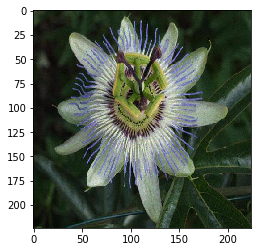

In [6]:

img = image.load_img('../input/he_challenge_data/data/train/'+df_train['image_id'][0].astype('str')+'.jpg', target_size=(224,224,1))
imgplot = plt.imshow(img)

In [7]:
#Next, we will read all the training images, store them in a list, 
#and finally convert #that list into a numpy array.

train_image = []
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('../input/he_challenge_data/data/train/'+df_train['image_id'][i].astype('str')+'.jpg', target_size=(50,50,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)




100%|██████████| 18540/18540 [02:10<00:00, 142.12it/s]


In [8]:
X.shape

(18540, 50, 50, 3)

In [9]:
y=df_train['category'].values
y = to_categorical(y)

In [10]:
y.shape

(18540, 103)

In [12]:
df_train['category'].value_counts()

51     582
77     567
46     441
73     438
89     414
74     387
81     375
94     366
88     348
78     309
83     297
43     294
41     288
95     288
75     270
58     258
82     252
60     246
56     246
76     243
37     243
80     237
65     231
72     216
53     210
44     210
23     207
96     207
50     207
12     198
      ... 
64     117
61     114
19     111
15     111
49     111
100    111
13     111
14     108
102    108
93     105
9      105
33     105
32     102
6      102
10     102
35      99
67      96
24      96
39      93
79      93
25      93
26      93
16      93
34      90
3       90
21      90
7       90
1       90
27      90
45      90
Name: category, Length: 102, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50, 50, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(103, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 14832 samples, validate on 3708 samples
Epoch 1/10
14832/14832 [==============================] - 4s 267us/step - loss: 2.3515 - acc: 0.3575 - val_loss: 2.2007 - val_acc: 0.4161
Epoch 2/10
14832/14832 [==============================] - 4s 263us/step - loss: 2.1587 - acc: 0.3941 - val_loss: 2.0367 - val_acc: 0.4431
Epoch 3/10
14832/14832 [==============================] - 4s 263us/step - loss: 1.9453 - acc: 0.4469 - val_loss: 2.0172 - val_acc: 0.4493
Epoch 4/10
14832/14832 [==============================] - 4s 260us/step - loss: 1.8000 - acc: 0.4740 - val_loss: 1.9112 - val_acc: 0.4738
Epoch 5/10
14832/14832 [==============================] - 4s 265us/step - loss: 1.6767 - acc: 0.5018 - val_loss: 1.9280 - val_acc: 0.4822
Epoch 6/10
14832/14832 [==============================] - 4s 261us/step - loss: 1.5357 - acc: 0.5345 - val_loss: 1.8481 - val_acc: 0.4981
Epoch 7/10
14832/14832 [==============================] - 4s 266us/step - loss: 1.4754 - acc: 0.5472 - val_loss: 1.9091 - v

In [18]:
df_test = pd.read_csv("../input/he_challenge_data/data/test.csv")
df_test['image_id'][0]

18540

In [19]:
test_image = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('../input/he_challenge_data/data/test/'+df_test['image_id'][i].astype('str')+'.jpg', target_size=(50,50,1))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 2009/2009 [00:12<00:00, 158.80it/s]


In [25]:
prediction = model.predict_classes(test)
prediction

array([ 4, 96, 97, ..., 88, 72, 94])

In [26]:

df_prediction= pd.DataFrame({'category':prediction})
df_prediction

,category
0,4
1,96
2,97
3,30
4,51
5,4
6,87
7,58
8,86
9,89


In [27]:
sample = pd.read_csv('../input/he_challenge_data/data/sample_submission.csv')

#sample['label'] = prediction
#sample.to_csv('sample_cnn.csv', header=True, index=False)

In [33]:
df_final= sample.iloc[:,[0]]
df_final=pd.concat([df_final,df_prediction],axis=1)
df_final

,image_id,category
0,18540,4
1,18541,96
2,18542,97
3,18543,30
4,18544,51
5,18545,4
6,18546,87
7,18547,58
8,18548,86
9,18549,89


In [34]:
pd.DataFrame(df_final).to_csv('myprediction_NN.csv',index = False)